# Baynes Sound
# May 30, 2017

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from salishsea_tools import (nc_tools, geo_tools, tidetools) 
import netCDF4 as nc

In [4]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [5]:
Bathy, lon, lats = tidetools.get_bathy_data(grid)

In [6]:
geo_tools.find_closest_model_point( -124.74465,49.4616, lon, lats, land_mask = Bathy.mask)

(599, 125)

In [93]:
Jun_data = glob.glob('/results/SalishSea/hindcast/3*jun15/SalishSea_1h*grid_T.nc')
Jun_data

['/results/SalishSea/hindcast/30jun15/SalishSea_1h_20150630_20150630_grid_T.nc']

In [7]:
ordered = ['/results/SalishSea/hindcast/01jun15/SalishSea_1h_20150601_20150601_grid_T.nc',
          '/results/SalishSea/hindcast/02jun15/SalishSea_1h_20150602_20150602_grid_T.nc',
          '/results/SalishSea/hindcast/03jun15/SalishSea_1h_20150603_20150603_grid_T.nc',
          '/results/SalishSea/hindcast/04jun15/SalishSea_1h_20150604_20150604_grid_T.nc',
          '/results/SalishSea/hindcast/05jun15/SalishSea_1h_20150605_20150605_grid_T.nc',
          '/results/SalishSea/hindcast/06jun15/SalishSea_1h_20150606_20150606_grid_T.nc',
          '/results/SalishSea/hindcast/07jun15/SalishSea_1h_20150607_20150607_grid_T.nc',
          '/results/SalishSea/hindcast/08jun15/SalishSea_1h_20150608_20150608_grid_T.nc',
          '/results/SalishSea/hindcast/09jun15/SalishSea_1h_20150609_20150609_grid_T.nc',
          '/results/SalishSea/hindcast/10jun15/SalishSea_1h_20150610_20150610_grid_T.nc',
          '/results/SalishSea/hindcast/11jun15/SalishSea_1h_20150611_20150611_grid_T.nc',
          '/results/SalishSea/hindcast/12jun15/SalishSea_1h_20150612_20150612_grid_T.nc',
          '/results/SalishSea/hindcast/13jun15/SalishSea_1h_20150613_20150613_grid_T.nc',
          '/results/SalishSea/hindcast/14jun15/SalishSea_1h_20150614_20150614_grid_T.nc',
          '/results/SalishSea/hindcast/15jun15/SalishSea_1h_20150615_20150615_grid_T.nc',
          '/results/SalishSea/hindcast/16jun15/SalishSea_1h_20150616_20150616_grid_T.nc',
          '/results/SalishSea/hindcast/17jun15/SalishSea_1h_20150617_20150617_grid_T.nc',
          '/results/SalishSea/hindcast/18jun15/SalishSea_1h_20150618_20150618_grid_T.nc',
          '/results/SalishSea/hindcast/19jun15/SalishSea_1h_20150619_20150619_grid_T.nc',
          '/results/SalishSea/hindcast/20jun15/SalishSea_1h_20150620_20150620_grid_T.nc',
          '/results/SalishSea/hindcast/21jun15/SalishSea_1h_20150621_20150621_grid_T.nc',
          '/results/SalishSea/hindcast/22jun15/SalishSea_1h_20150622_20150622_grid_T.nc',
          '/results/SalishSea/hindcast/23jun15/SalishSea_1h_20150623_20150623_grid_T.nc',
          '/results/SalishSea/hindcast/24jun15/SalishSea_1h_20150624_20150624_grid_T.nc',
          '/results/SalishSea/hindcast/25jun15/SalishSea_1h_20150625_20150625_grid_T.nc',
          '/results/SalishSea/hindcast/26jun15/SalishSea_1h_20150626_20150626_grid_T.nc',
          '/results/SalishSea/hindcast/27jun15/SalishSea_1h_20150627_20150627_grid_T.nc',
          '/results/SalishSea/hindcast/28jun15/SalishSea_1h_20150628_20150628_grid_T.nc',
          '/results/SalishSea/hindcast/29jun15/SalishSea_1h_20150629_20150629_grid_T.nc',
          '/results/SalishSea/hindcast/30jun15/SalishSea_1h_20150630_20150630_grid_T.nc']

with nc_tools.scDataset(ordered) as f:
    t = f.variables['votemper'][:,:,599,125]
    print(t.shape)

(720, 40)


In [128]:
excluding_zeros = t[:,0:12:1]

In [8]:
with nc_tools.scDataset(ordered) as f:
    s = f.variables['vosaline'][:,:,599,125]
    print(s.shape)

(720, 40)


(12, 0)

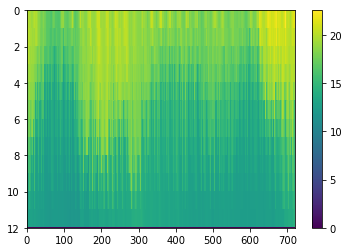

In [197]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(t.T)
fig.colorbar(mesh)
ax.set_ylim((12,0))

(12, 0)

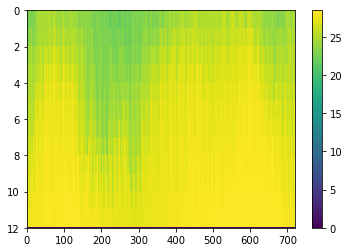

In [195]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(s.T)
fig.colorbar(mesh)
ax.set_ylim((12,0))

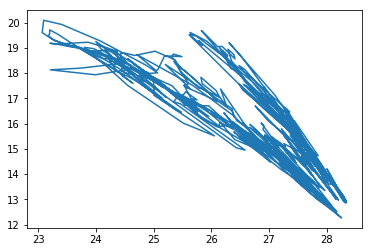

In [12]:
plt.plot(s[:,5],t[:,5]);
#plt.xlim(21,29)
#plt.ylim(11,24)

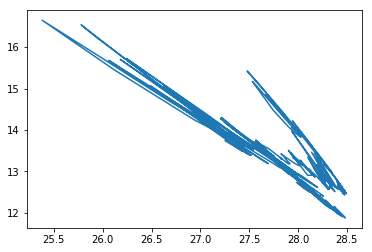

In [13]:
plt.plot(s[:,10],t[:,10]);

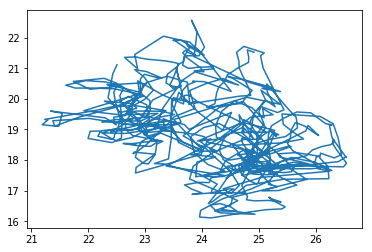

In [14]:
plt.plot(s[:,0],t[:,0]);

In [ ]:
Mar = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/B02/')